In [1]:
from scipy.io import loadmat, whosmat
import numpy as np
import matplotlib.pyplot as plt
import datetime
import json
import os
%matplotlib inline

In [2]:

def build_dictionaries(mat_file):
    charge, discharge,impedance = {},{},{}
    
    for i, element in enumerate(mat_file):
        step = element[0][0]
        step = element[0][0]

        if step == 'discharge':
            discharge[str(i)] = {}
            discharge[str(i)]["amb_temp"] = str(element[1][0][0])
            year = int(element[2][0][0])
            month = int(element[2][0][1])
            day = int(element[2][0][2])
            hour = int(element[2][0][3])
            minute = int(element[2][0][4])
            second = int(element[2][0][5])
            millisecond = int((second % 1)*1000)
            date_time = datetime.datetime(year, month, day, hour, minute, second, millisecond)        

            discharge[str(i)]["date_time"] = date_time.strftime("%d %b %Y, %H:%M:%S")

            data = element[3]

            discharge[str(i)]["voltage_battery"] = data[0][0][0][0].tolist()
            discharge[str(i)]["current_battery"] = data[0][0][1][0].tolist()
            discharge[str(i)]["temp_battery"] = data[0][0][2][0].tolist()
            discharge[str(i)]["current_load"] = data[0][0][3][0].tolist()
            discharge[str(i)]["voltage_load"] = data[0][0][4][0].tolist()
            discharge[str(i)]["time"] = data[0][0][5][0].tolist()
            discharge[str(i)]["capacity"] = data[0][0][6][0].tolist()
            

        if step == 'charge':
            charge[str(i)] = {}
            charge[str(i)]["amb_temp"] = str(element[1][0][0])
            year = int(element[2][0][0])
            month = int(element[2][0][1])
            day = int(element[2][0][2])
            hour = int(element[2][0][3])
            minute = int(element[2][0][4])
            second = int(element[2][0][5])
            millisecond = int((second % 1)*1000)
            date_time = datetime.datetime(year, month, day, hour, minute, second, millisecond)        

            charge[str(i)]["date_time"] = date_time.strftime("%d %b %Y, %H:%M:%S")

            data = element[3]

            charge[str(i)]["voltage_battery"] = data[0][0][0][0].tolist()
            charge[str(i)]["current_battery"] = data[0][0][1][0].tolist()
            charge[str(i)]["temp_battery"] = data[0][0][2][0].tolist()
            charge[str(i)]["current_load"] = data[0][0][3][0].tolist()
            charge[str(i)]["voltage_load"] = data[0][0][4][0].tolist()
            charge[str(i)]["time"] = data[0][0][5][0].tolist()

        if step == 'impedance':
            impedance[str(i)] = {}
            impedance[str(i)]["amb_temp"] = str(element[1][0][0])
            year = int(element[2][0][0])
            month = int(element[2][0][1])
            day = int(element[2][0][2])
            hour = int(element[2][0][3])
            minute = int(element[2][0][4])
            second = int(element[2][0][5])
            millisecond = int((second % 1)*1000)
            date_time = datetime.datetime(year, month, day, hour, minute, second, millisecond)        

            impedance[str(i)]["date_time"] = date_time.strftime("%d %b %Y, %H:%M:%S")

            data = element[3]

            impedance[str(i)]["sense_current"] = {}
            impedance[str(i)]["battery_current"] = {}
            impedance[str(i)]["current_ratio"] = {}
            impedance[str(i)]["battery_impedance"] = {}
            impedance[str(i)]["rectified_impedance"] = {}

            impedance[str(i)]["sense_current"]["real"] = np.real(data[0][0][0][0]).tolist()
            impedance[str(i)]["sense_current"]["imag"] = np.imag(data[0][0][0][0]).tolist()

            impedance[str(i)]["battery_current"]["real"] = np.real(data[0][0][1][0]).tolist()
            impedance[str(i)]["battery_current"]["imag"] = np.imag(data[0][0][1][0]).tolist()

            impedance[str(i)]["current_ratio"]["real"] = np.real(data[0][0][2][0]).tolist()
            impedance[str(i)]["current_ratio"]["imag"] = np.imag(data[0][0][2][0]).tolist()

            impedance[str(i)]["battery_impedance"]["real"] = np.real(data[0][0][3]).tolist()
            impedance[str(i)]["battery_impedance"]["imag"] = np.imag(data[0][0][3]).tolist()

            impedance[str(i)]["rectified_impedance"]["real"] = np.real(data[0][0][4]).tolist()
            impedance[str(i)]["rectified_impedance"]["imag"] = np.imag(data[0][0][4]).tolist()

            impedance[str(i)]["re"] = float(data[0][0][5][0][0])
            impedance[str(i)]["rct"] = float(data[0][0][6][0][0])
            
    return discharge, charge, impedance
    


In [3]:

def save_json(dictionary, name):
    with open(name + '.json', 'w') as f:
        json.dump(dictionary, f, indent=4)

In [5]:

folder = './Battery_Aging_ARC'
filenames = [f for f in os.listdir(folder) if f.endswith('.mat')]

for filename in filenames:
    name = filename.split('.mat')[0]
    print(name)
    struct = loadmat(folder + '/' + filename)
    mat_file = struct[name][0][0][0][0]
    
    discharge, charge, impedance = build_dictionaries(mat_file)
    
    save_json(discharge, name + '_discharge')
    save_json(charge, name + '_charge')    
    save_json(impedance, name + '_impedance')

B0005
B0006
B0007
B0018


In [150]:
with open('./B0006_discharge.json') as f:
    discharge_data_B0006 = json.load(f)
with open('./B0007_discharge.json') as f:
    discharge_data_B0007 = json.load(f)
with open('./B0018_discharge.json') as f:
    discharge_data_B0018 = json.load(f)



with open('./B0005_charge.json') as f:
    charge_data = json.load(f)
with open('./B0005_impedance.json') as f:    
    impedance_data = json.load(f)
    
with open('./B0005_discharge.json') as f:    
    discharge_data = json.load(f)

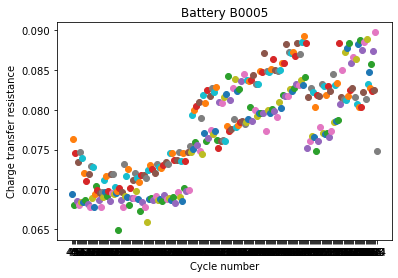

In [103]:
for cycle in impedance_data.keys():
    plt.plot(cycle, impedance_data[cycle]["rct"],'o')
    plt.ylabel('Charge transfer resistance')
    plt.xlabel('Cycle number')
    plt.title('Battery B0005')
plt.show()

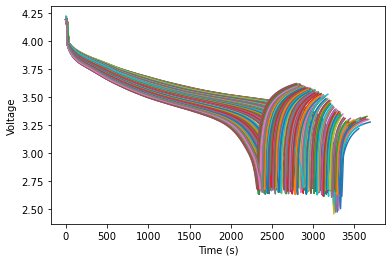

In [21]:

for cycle in discharge_data.keys():
    plt.plot(discharge_data[cycle]["time"], discharge_data[cycle]["voltage_battery"], '-')
    plt.ylabel('Voltage')
    plt.xlabel('Time (s)')
plt.show()

In [23]:
with open('B0005_charge.json') as f_charge:    
    charge_data = json.load(f_charge)
with open('B0005_discharge.json') as f_discharge:    
    discharge_data = json.load(f_discharge)

In [27]:
for cycle in discharge_data.keys():
    deltaV = discharge_data[cycle]["voltage_battery"][1]-discharge_data[cycle]["voltage_battery"][2]
    current = abs(discharge_data[cycle]["current_battery"][2])
    resistance = deltaV/current
    discharge_data[cycle]["resistance"] = resistance
    print('resistance = ',discharge_data[cycle]["resistance"])

resistance =  0.10726713903226778
resistance =  0.10409959835055158
resistance =  0.10280602926875614
resistance =  0.10247192208012364
resistance =  0.10185177093902217
resistance =  0.1016003112043362
resistance =  0.10077104615058216
resistance =  0.10034945401080046
resistance =  0.10002243606058248
resistance =  0.10022818289323593
resistance =  0.10021474276602002
resistance =  0.09939618724226928
resistance =  0.09941202025981682
resistance =  0.09969367282139881
resistance =  0.09969632272012346
resistance =  0.09974067201473798
resistance =  0.09951451104234073
resistance =  0.09957126587454869
resistance =  0.09955798326651409
resistance =  0.09958648218293814
resistance =  0.09910493575743354
resistance =  0.09924479682981556
resistance =  0.09965012519746536
resistance =  0.09975826877325594
resistance =  0.09966692726383458
resistance =  0.0997571454671254
resistance =  0.10002299401376592
resistance =  0.10008132333331426
resistance =  0.10000117216233402
resistance =  0.

In [85]:
import matplotlib.ticker as plticker

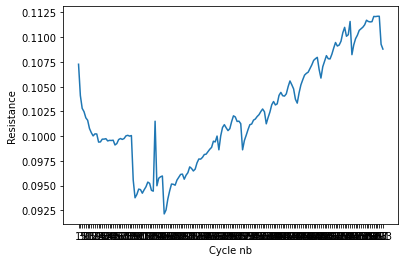

In [26]:

resistance_array = np.array([])
cycle_array = np.array([])
for cycle in discharge_data.keys():
    resistance_array = np.append(resistance_array,discharge_data[cycle]["resistance"])
    cycle_array = np.append(cycle_array,cycle)
    
plt.plot(cycle_array,resistance_array, '-')
plt.ylabel("Resistance")
plt.xlabel('Cycle nb')
    #plt.ylim(3,4.5)
    #plt.xlim(0,4000)
plt.show()

In [44]:
discharge_data.keys()

dict_keys(['1', '3', '5', '7', '9', '11', '13', '15', '17', '19', '21', '24', '26', '28', '30', '32', '34', '36', '38', '41', '45', '49', '53', '57', '61', '65', '69', '73', '77', '81', '85', '89', '93', '97', '101', '105', '109', '113', '117', '121', '125', '129', '133', '135', '139', '143', '147', '149', '153', '157', '161', '165', '169', '173', '177', '181', '185', '189', '193', '197', '201', '205', '209', '213', '215', '219', '223', '227', '231', '235', '239', '243', '247', '251', '255', '259', '263', '265', '269', '273', '277', '281', '285', '289', '293', '297', '301', '305', '309', '312', '315', '319', '323', '327', '331', '335', '339', '343', '347', '351', '355', '359', '363', '366', '370', '374', '378', '382', '386', '390', '394', '398', '402', '406', '410', '414', '418', '422', '426', '430', '432', '436', '440', '444', '448', '452', '456', '460', '464', '468', '472', '476', '480', '482', '484', '488', '492', '496', '500', '504', '508', '512', '516', '520', '524', '528', '532',

In [46]:
for cycle in charge_data.keys():
    deltaV = charge_data[cycle]["voltage_battery"][1]-charge_data[cycle]["voltage_battery"][2]
    current = abs(charge_data[cycle]["current_battery"][2])
    resistance = deltaV/current
    charge_data[cycle]["resistance"] = resistance

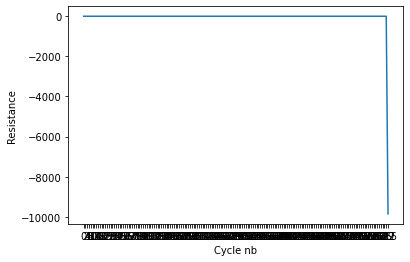

In [47]:
resistance_array = np.array([])
cycle_array = np.array([])
for cycle in charge_data.keys():
    resistance_array = np.append(resistance_array,charge_data[cycle]["resistance"])
    cycle_array = np.append(cycle_array,cycle)
    
plt.plot(cycle_array,resistance_array, '-')
plt.ylabel("Resistance")
plt.xlabel('Cycle nb')
    #plt.ylim(3,4.5)
    #plt.xlim(0,4000)
plt.show()

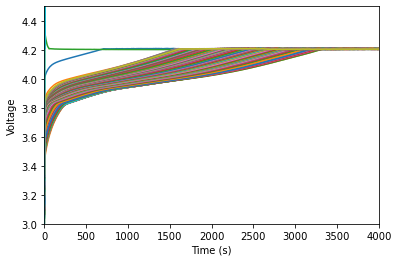

In [110]:
for cycle in charge_data.keys():
    plt.plot(charge_data[cycle]["time"], charge_data[cycle]["voltage_battery"],'-')
    #plt.plot(discharge_data[cycle]["time"], discharge_data[cycle]["voltage_battery"], '-')
    plt.ylabel('Voltage')
    plt.xlabel('Time (s)')
    plt.ylim(3,4.5)
    plt.xlim(0,4000)
plt.show()

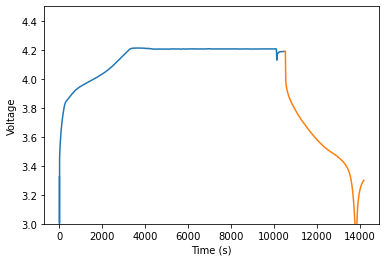

In [55]:
plt.plot(charge_data['2']["time"], charge_data['2']['voltage_battery'], '-')
plt.plot([x+charge_data['2']["time"][-1] for x in discharge_data['3']["time"]], discharge_data['3']['voltage_battery'], '-')
plt.ylabel('Voltage')
plt.xlabel('Time (s)')
plt.ylim(3,4.5)
plt.show()

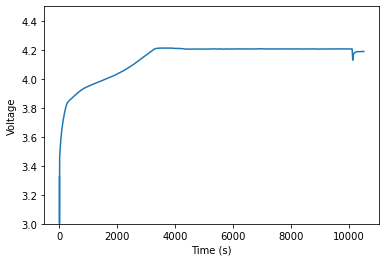

In [57]:
plt.plot(charge_data['2']["time"], charge_data['2']['voltage_battery'], '-')
plt.ylabel('Voltage')
plt.xlabel('Time (s)')
plt.ylim(3,4.5)
plt.show()

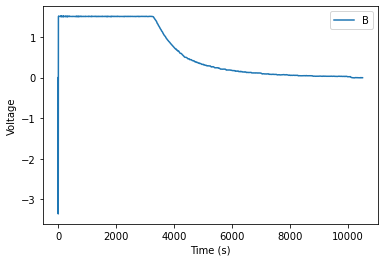

In [171]:
plt.plot(charge_data['2']["time"], charge_data['2']["current_battery"], '-')
plt.ylabel('Voltage')
plt.xlabel('Time (s)')
plt.show()

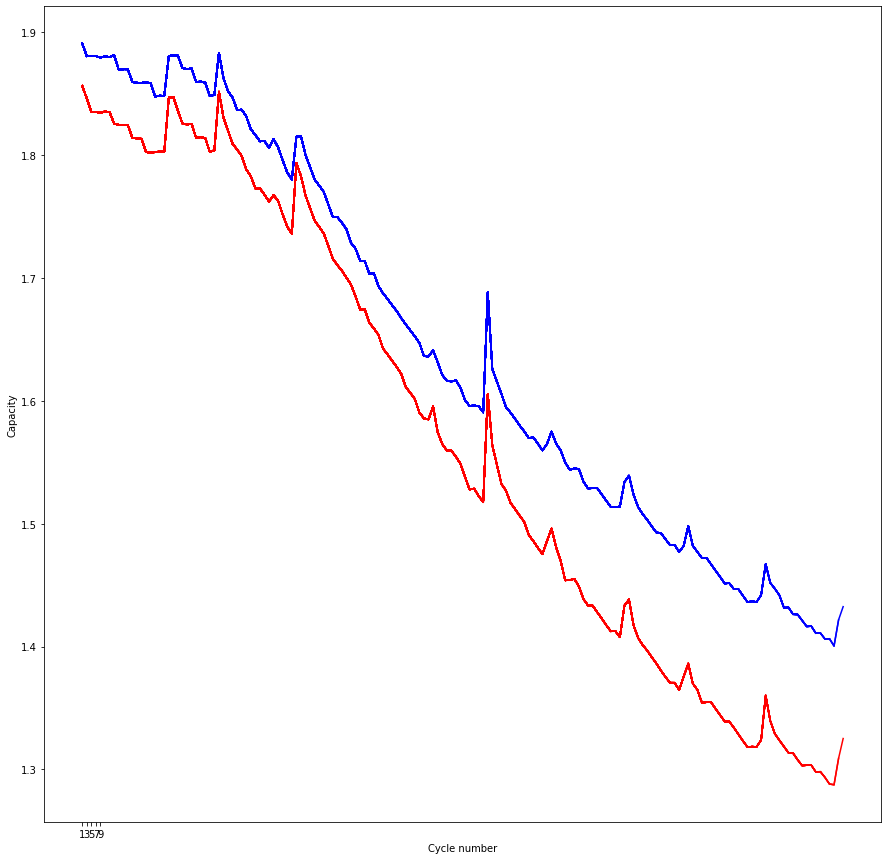

In [195]:
plt.figure(figsize=(15,15))
locs, labels = plt.xticks()  # Get the current locations and labels.




cycle_array = np.array([])
discharge_data_array = np.array([])


for cycle in discharge_data_B0007.keys():
    cycle_array = np.append(cycle_array,cycle)
    
    discharge_data_array = np.append(discharge_data_array,discharge_data_B0007[cycle]["capacity"])
    
    plt.plot(cycle_array, discharge_data_array,'b')
    
   
   
plt.xticks(np.arange(5)) 

    
cycle_array = np.array([])
discharge_data_array = np.array([])


for cycle in discharge_data.keys():
    cycle_array = np.append(cycle_array,cycle)
    discharge_data_array = np.append(discharge_data_array,discharge_data[cycle]["capacity"])
    plt.plot(cycle_array, discharge_data_array,'r')
    
    
    plt.ylabel('Capacity')
    plt.xlabel('Cycle number')   
plt.show()

In [141]:
np.arange(0, 150, step=10)

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140])

In [192]:
len(discharge_data.keys())

168

In [193]:
len(charge_data.keys())

170

In [191]:
discharge_data_B0007.keys()

dict_keys(['1', '3', '5', '7', '9', '11', '13', '15', '17', '19', '21', '24', '26', '28', '30', '32', '34', '36', '38', '41', '45', '49', '53', '57', '61', '65', '69', '73', '77', '81', '85', '89', '93', '97', '101', '105', '109', '113', '117', '121', '125', '129', '133', '135', '139', '143', '147', '149', '153', '157', '161', '165', '169', '173', '177', '181', '185', '189', '193', '197', '201', '205', '209', '213', '215', '219', '223', '227', '231', '235', '239', '243', '247', '251', '255', '259', '263', '265', '269', '273', '277', '281', '285', '289', '293', '297', '301', '305', '309', '312', '315', '319', '323', '327', '331', '335', '339', '343', '347', '351', '355', '359', '363', '366', '370', '374', '378', '382', '386', '390', '394', '398', '402', '406', '410', '414', '418', '422', '426', '430', '432', '436', '440', '444', '448', '452', '456', '460', '464', '468', '472', '476', '480', '482', '484', '488', '492', '496', '500', '504', '508', '512', '516', '520', '524', '528', '532',

In [121]:
cycle_array

array(['1', '3', '5', '7', '9', '11', '13', '15', '17', '19', '21', '24',
       '26', '28', '30', '32', '34', '36', '38', '41', '45', '49', '53',
       '57', '61', '65', '69', '73', '77', '81', '85', '89', '93', '97',
       '101', '105', '109', '113', '117', '121', '125', '129', '133',
       '135', '139', '143', '147', '149', '153', '157', '161', '165',
       '169', '173', '177', '181', '185', '189', '193', '197', '201',
       '205', '209', '213', '215', '219', '223', '227', '231', '235',
       '239', '243', '247', '251', '255', '259', '263', '265', '269',
       '273', '277', '281', '285', '289', '293', '297', '301', '305',
       '309', '312', '315', '319', '323', '327', '331', '335', '339',
       '343', '347', '351', '355', '359', '363', '366', '370', '374',
       '378', '382', '386', '390', '394', '398', '402', '406', '410',
       '414', '418', '422', '426', '430', '432', '436', '440', '444',
       '448', '452', '456', '460', '464', '468', '472', '476', '480',
       '48

In [122]:
discharge_data_array

array([1.85648742, 1.84632725, 1.83534919, 1.83526253, 1.83464551,
       1.83566166, 1.83514614, 1.82575679, 1.82477385, 1.82461327,
       1.82461955, 1.81420194, 1.81375216, 1.81344049, 1.802598  ,
       1.8021069 , 1.8025795 , 1.80306831, 1.80277762, 1.84702599,
       1.84741731, 1.83617742, 1.82578075, 1.82511364, 1.8255815 ,
       1.81403113, 1.81476919, 1.81396939, 1.80276567, 1.80407704,
       1.85180255, 1.83070385, 1.81990411, 1.80930796, 1.8046099 ,
       1.79937707, 1.78844323, 1.78292305, 1.77303372, 1.77303776,
       1.76787211, 1.76231507, 1.76761729, 1.76266836, 1.75173049,
       1.7418496 , 1.73609135, 1.79362401, 1.78318902, 1.76736421,
       1.75701779, 1.74687062, 1.74171725, 1.73642251, 1.72632172,
       1.71580654, 1.71053335, 1.7060145 , 1.70031103, 1.69457986,
       1.68490291, 1.67447416, 1.67456925, 1.66371638, 1.65901387,
       1.65385406, 1.64265378, 1.63785784, 1.63273504, 1.62775289,
       1.62212549, 1.61132566, 1.60656314, 1.60151422, 1.59036

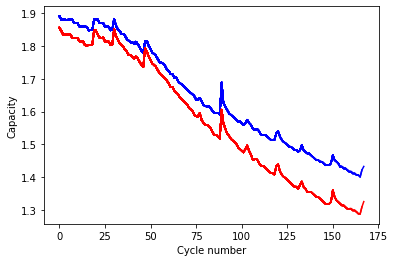

In [198]:


cycle_array = np.array([])
discharge_data_array = np.array([])


for i,cycle in enumerate(discharge_data_B0007.keys()):
    cycle_array = np.append(cycle_array,i)    
    discharge_data_array = np.append(discharge_data_array,discharge_data_B0007[cycle]["capacity"])    
    plt.plot(cycle_array, discharge_data_array,'b')


cycle_array = np.array([])
discharge_data_array = np.array([])

for i,cycle in enumerate(discharge_data.keys()):
    cycle_array = np.append(cycle_array,i)
    discharge_data_array = np.append(discharge_data_array,discharge_data[cycle]["capacity"])
    plt.plot(cycle_array, discharge_data_array,'r')
    
    
    plt.ylabel('Capacity')
    plt.xlabel('Cycle number')   
plt.show()